## Data preparation

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## import dataset

In [2]:
dataset = pd.read_csv("./cardio_train.csv", sep=';')

In [3]:
dataset.head(2)

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1


In [4]:
#get all types of dataset
dataset.describe(include='all')

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,49972.419900,19468.865814,1.349571,164.359229,74.205690,128.817286,96.630414,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700
std,28851.302323,2467.251667,0.476838,8.210126,14.395757,154.011419,188.472530,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003
min,0.000000,10798.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,25006.750000,17664.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,50001.500000,19703.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,74889.250000,21327.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,99999.000000,23713.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


## calculate bmi and years of age, delete unneeded columns

In [31]:
dataset['years'] = (dataset['age'] / 365).round().astype('int')
dataset['BMI'] = dataset['weight']/((dataset['height']/100)**2)
dataset.isnull().values.any()
dataset.drop(['id', 'age', 'weight', 'height'], axis=1)

,gender,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,years,BMI
0,2,110,80,1,1,0,0,1,0,50,21.967120
1,1,140,90,3,1,0,0,1,1,55,34.927679
2,1,130,70,3,1,0,0,0,1,52,23.507805
3,2,150,100,1,1,0,0,1,1,48,28.710479
4,1,100,60,1,1,0,0,0,0,48,23.011177
5,1,120,80,2,2,0,0,0,0,60,29.384676
6,1,130,80,3,1,0,0,1,0,61,37.729725
7,2,130,90,3,3,0,0,1,1,62,29.983588
8,1,110,70,1,1,0,0,1,0,48,28.440955
9,1,110,60,1,1,0,0,0,0,54,25.282570


## plot data (pairplot and heatmap for correlation)

/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


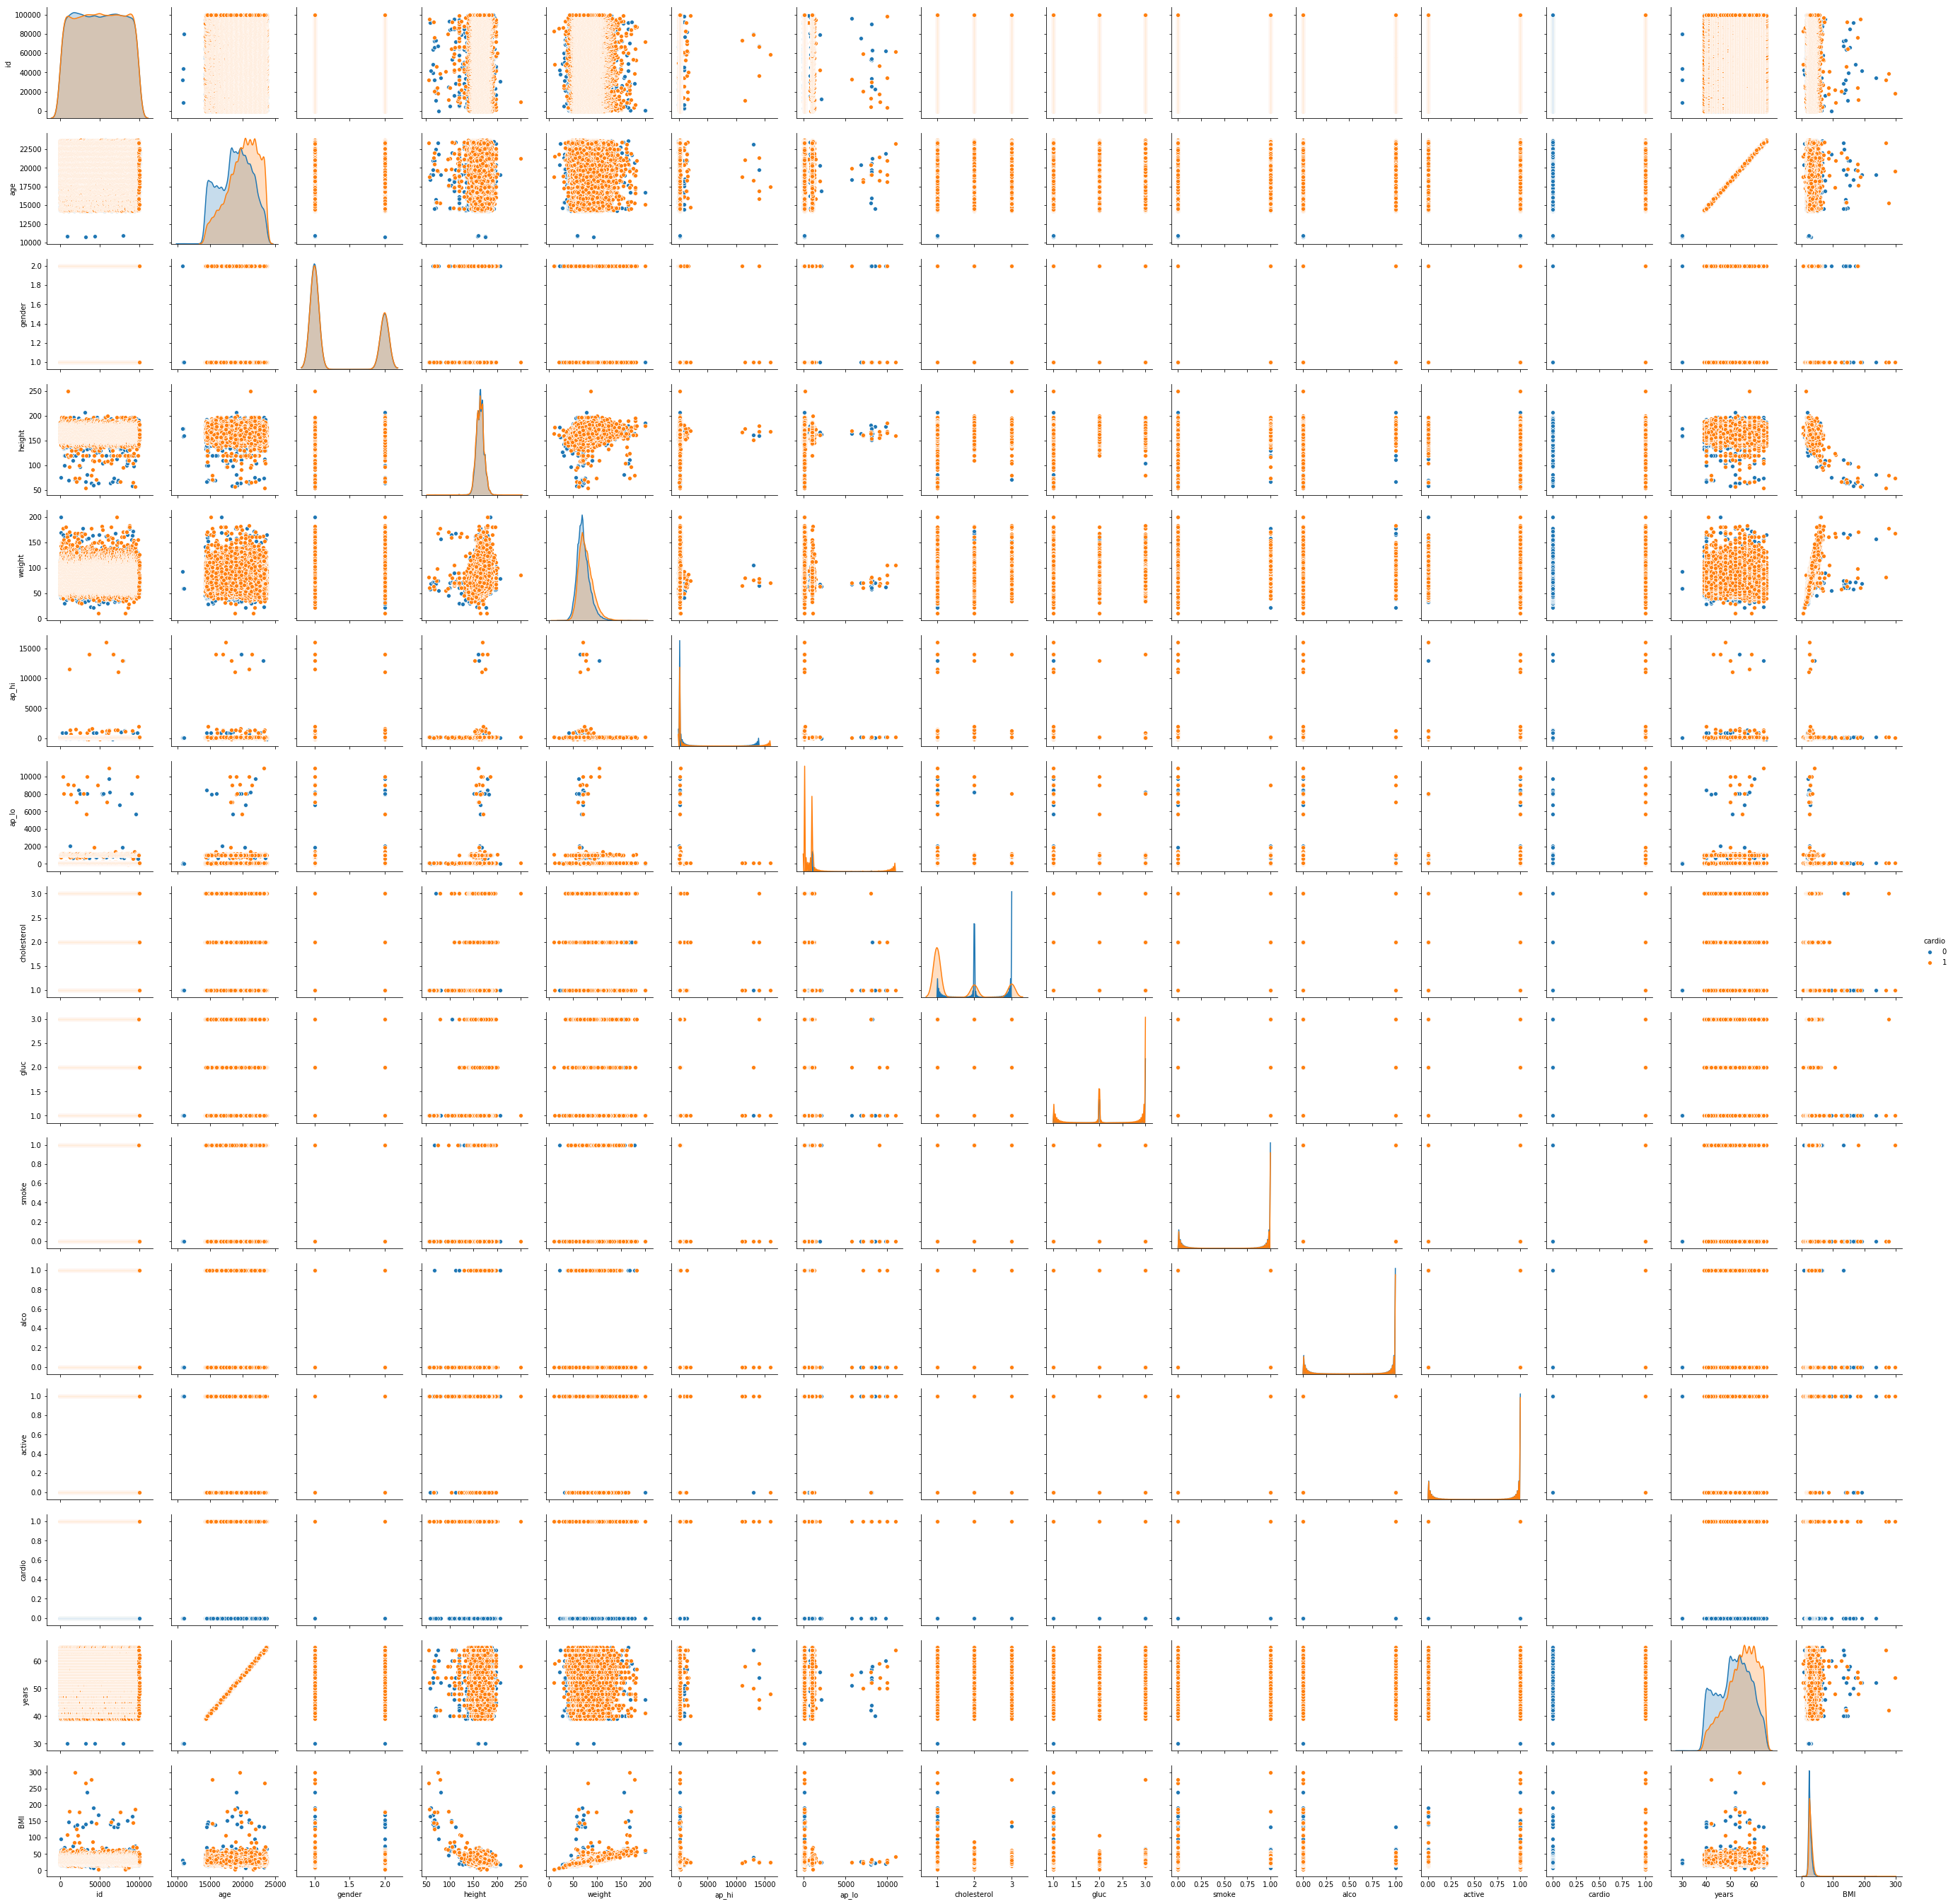

In [32]:
sns.pairplot(dataset, hue='cardio')

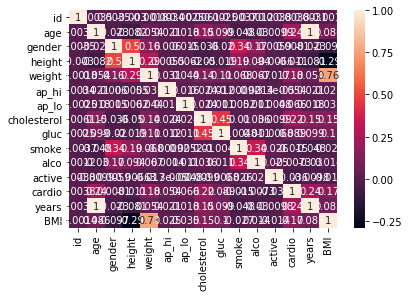

In [33]:
sns.heatmap(dataset.corr(), annot=True)

## create input features and target variables for neural network

In [50]:
# creating input features and target variables
X= dataset.drop(['cardio', 'id','age', 'height', 'weight'], axis=1)
y= dataset.drop(['id','height','weight','age','gender','ap_hi','ap_lo','cholesterol','gluc','smoke','alco','active','years','BMI'], axis=1)

In [51]:
X.head(2)

,gender,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,years,BMI
0,2,110,80,1,1,0,0,1,50,21.967120
1,1,140,90,3,1,0,0,1,55,34.927679


## normalization of input features

In [56]:
#standardizing the input feature
#Since our input features are at different scales we need to standardize the input.
# (Normalization)
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)
X

array([[ 1.36405487, -0.12218198, -0.0882385 , ...,  0.49416711,
        -0.49350546, -0.91757729],
       [-0.73310834,  0.07261016, -0.03517999, ...,  0.49416711,
         0.24556599,  1.21008057],
       [-0.73310834,  0.00767945, -0.14129701, ..., -2.02360695,
        -0.19787688, -0.66465218],
       ...,
       [ 1.36405487,  0.33233302, -0.03517999, ..., -2.02360695,
        -0.19787688,  0.62334178],
       [-0.73310834,  0.04014481, -0.0882385 , ..., -2.02360695,
         1.13245175, -0.07506591],
       [-0.73310834, -0.05725127, -0.0882385 , ...,  0.49416711,
         0.39338029, -0.4338885 ]])

## Model Building

In [57]:
# split the input features and target variables into training dataset and test dataset.
# test dataset will be 30% of our entire dataset.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [58]:
from keras import Sequential
from keras.layers import Dense

In [59]:
classifier = Sequential()
#First Hidden Layer
classifier.add(Dense(5, activation='relu', kernel_initializer='random_normal', input_dim=10))#Second  Hidden Layer
classifier.add(Dense(5, activation='relu', kernel_initializer='random_normal'))#Output Layer
classifier.add(Dense(1, activation='sigmoid', kernel_initializer='random_normal'))

In [60]:
#Compiling the neural network
classifier.compile(optimizer ='adam',loss='binary_crossentropy', metrics =['accuracy'])

## Model training

In [62]:
#Fitting the data to the training dataset
classifier.fit(X_train,y_train, batch_size=10, epochs=100)

Epoch 1/100
49000/49000 [==============================] - 4s 82us/step - loss: 0.5421 - acc: 0.7324
Epoch 2/100
49000/49000 [==============================] - 4s 81us/step - loss: 0.5423 - acc: 0.7334
Epoch 3/100
49000/49000 [==============================] - 4s 84us/step - loss: 0.5422 - acc: 0.7319
Epoch 4/100
49000/49000 [==============================] - 4s 82us/step - loss: 0.5420 - acc: 0.7328
Epoch 5/100
49000/49000 [==============================] - 4s 82us/step - loss: 0.5421 - acc: 0.7330
Epoch 6/100
49000/49000 [==============================] - 4s 82us/step - loss: 0.5421 - acc: 0.7328
Epoch 7/100
49000/49000 [==============================] - 4s 83us/step - loss: 0.5420 - acc: 0.7335
Epoch 8/100
49000/49000 [==============================] - 4s 84us/step - loss: 0.5421 - acc: 0.7331
Epoch 9/100
49000/49000 [==============================] - 4s 86us/step - loss: 0.5421 - acc: 0.7327
Epoch 10/100
49000/49000 [==============================] - 4s 84us/step - loss: 0.5420 - a

## Model evaluation

In [63]:
eval_model=classifier.evaluate(X_train, y_train)
eval_model

49000/49000 [==============================] - 0s 9us/step


[0.5403157654392476, 0.7336938775510204]

## Predict cardiovascular disease

In [64]:
y_pred=classifier.predict(X_test)
y_pred =(y_pred>0.5)

In [65]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[8056 2524]
 [3072 7348]]


## total richtig/positiv falsch/negativ: 8056 + 7348 = 15404

## insgesamt: 21000

## accuracy: 100 / 21000 * 15404 = 73,35 %

## With the given inputs we can predict with a 73% accuracy if the person will suffer from cardiovascular disease or not